In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Display Images

In [2]:
normal_xray = cv2.cvtColor(cv2.imread('chest_xray/train/NORMAL/IM-0115-0001.jpeg'),cv2.COLOR_BGR2RGB)

In [3]:
normal_xray.shape

(1858, 2090, 3)

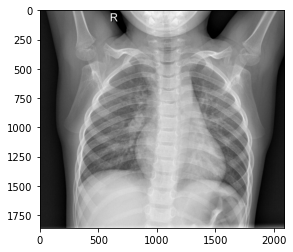

In [4]:
plt.imshow(normal_xray)

In [5]:
pneumonia_xray = cv2.cvtColor(cv2.imread('chest_xray/train/PNEUMONIA/person1_bacteria_1.jpeg'),cv2.COLOR_BGR2RGB)

In [6]:
pneumonia_xray.shape

(439, 712, 3)

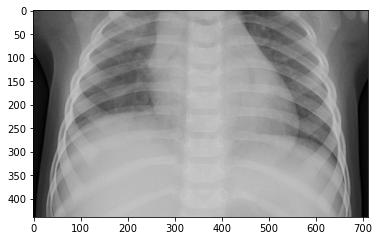

In [7]:
plt.imshow(pneumonia_xray)

# Data Generation And Preprocessing

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

done


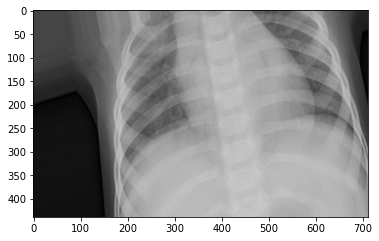

In [10]:
plt.imshow(image_gen.random_transform(pneumonia_xray))
print('done')

In [11]:
image_gen.flow_from_directory('chest_xray/train')

Found 5216 images belonging to 2 classes.


In [12]:
image_gen.flow_from_directory('chest_xray/test')

Found 624 images belonging to 2 classes.


In [13]:
input_shape = (700,700,3)

# Building Model

In [14]:
from tensorflow.keras.models import Sequential

In [15]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation,Dropout

In [16]:
model = Sequential() 

In [17]:
#Conv B1
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#Conv B2
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#Conv B3
model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

 
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 698, 698, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 349, 349, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 349, 349, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 347, 347, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 173, 173, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 173, 173, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 171, 171, 128)     7

In [20]:
input_shape[:2]

(700, 700)

In [21]:
batch_size = 8

train_gen = image_gen.flow_from_directory('chest_xray/train',
                                         target_size=input_shape[:2],
                                         batch_size=batch_size,
                                         class_mode='binary')

Found 5216 images belonging to 2 classes.


In [22]:
test_gen = image_gen.flow_from_directory('chest_xray/test',
                                         target_size=input_shape[:2],
                                         batch_size=batch_size,
                                         class_mode='binary')

Found 624 images belonging to 2 classes.


In [23]:
train_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [24]:
results = model.fit_generator(train_gen,epochs=20,steps_per_epoch=120,validation_data=test_gen,validation_steps=12)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
120/120 [==============================] - 1250s 10s/step - loss: 2.3085 - accuracy: 0.7240 - val_loss: 0.4134 - val_accuracy: 0.6979
Epoch 2/20
120/120 [==============================] - 1201s 10s/step - loss: 0.3815 - accuracy: 0.7437 - val_loss: 0.4943 - val_accuracy: 0.8750
Epoch 3/20
120/120 [==============================] - 1223s 10s/step - loss: 0.3933 - accuracy: 0.7802 - val_loss: 0.5510 - val_accuracy: 0.7812
Epoch 4/20
120/120 [==============================] - 1228s 10s/step - loss: 0.4248 - accuracy: 0.7760 - val_loss: 0.5172 - val_accuracy: 0.6667
Epoch 5/20
120/120 [==============================] - 1231s 10s/step - loss: 0.3507 - accuracy: 0.8083 - val_loss: 0.5318 - val_accuracy: 0.8438
Epoch 6/20
120/120 [==============================] - 1290s 11s/step - loss: 0.4091 - accuracy: 0.8083 - val_loss: 0.5531 - val_accuracy: 0.7083
Epoch 7/20
120/120 [==============================] - 

In [25]:
print(results.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


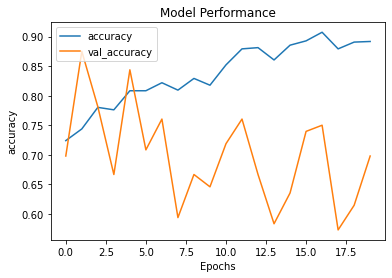

In [26]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Performance')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['accuracy','val_accuracy'],loc='upper left')
plt.show()
plt.close()

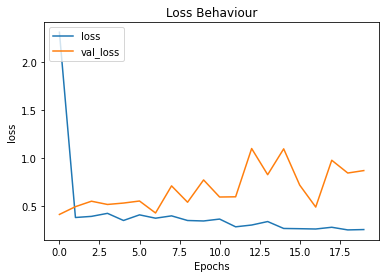

In [27]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Loss Behaviour')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['loss','val_loss'],loc='upper left')
plt.show()
plt.close()

In [28]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Pneumonia Prediction

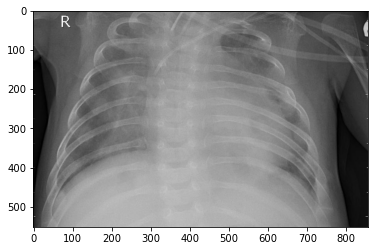

In [37]:
test_image = cv2.cvtColor(cv2.imread('chest_xray/test/PNEUMONIA/person1_virus_9.jpeg'),cv2.COLOR_BGR2RGB)
plt.imshow(test_image)

In [30]:
pneumonia_xray = image.load_img('chest_xray/test/PNEUMONIA/person1_virus_9.jpeg',target_size=(700,700))

pneumonia_xray = image.img_to_array(pneumonia_xray)
print(pneumonia_xray.shape)
pneumonia_xray = np.expand_dims(pneumonia_xray,axis=0)
print(pneumonia_xray.shape)
pneumonia_xray = pneumonia_xray/255

(700, 700, 3)
(1, 700, 700, 3)


In [31]:
prediction = model.predict(pneumonia_xray)

In [33]:
print(f'Probabibility of pneumonia is: {prediction}')

Probabibility of pneumonia is: [[0.96698755]]


In [34]:
result = model.predict_classes(pneumonia_xray)
print(result)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[1]]


In [35]:
model.save('chest_xray_pneumonia.h5')